In [182]:
from radd import build, models, fit, vis, neuro
from numpy.random import sample as rs
from collections import OrderedDict

In [232]:
inits = prodf_store.vtheta
inits['v'] = np.sort(vopt.values())


In [249]:
x = '_'.join([k.upper() for k in ['x']])
x

In [250]:
x

'x'

In [248]:
x.upper()

'X_Y_HYP'

In [243]:
x+['hyp']

['xb', 'hyp']

In [237]:
m.depends_on.keys()

['xb']

In [236]:
prov_inits_nossv={'a': 0.47483, 'tr': 0.272536, 'v': array([ 1.39321,  1.52084,  1.65874,  1.75702,  1.89732,  1.94936]),  'z': 0}
inits

{'a': 0.47483,
 'tr': 0.272536,
 'v': array([ 1.39321,  1.52084,  1.65874,  1.75702,  1.89732,  1.94936]),
 'z': 0}

In [233]:
del inits['ssd']
del inits['ssv']
inits['a'] = inits['a']-inits['z']
inits['z'] = 0

KeyError: 'ssd'

In [231]:
inits

{'a': 0.32673500249999998,
 'tr': array([ 0.36803,  0.34669,  0.32555,  0.30535,  0.28855,  0.28082]),
 'v': 1.3812586266,
 'z': 0}

In [207]:
m = build.Model(data=prodf_store.prodata, kind='xpro', depends_on={'xb':'pGo'}, dynamic='exp')
m.optimize


      Model is prepared to fit xpro model (w/ exp dynamic bias) to average data,
      allowing Dynamic Drift to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      Optimize On, Wayne 



In [ ]:
prov_inits_nossv={'a': 0.473022, "tr":0.330223, "v":1.64306, 'xb': array([0.257877, 0.649422, 1.03762, 1.307329, 1.934637, 2.101918])}
protr_inits_nossv={'a': 0.326735, 'tr': array([ 0.36803,  0.34669,  0.32555,  0.30535,  0.28855,  0.28082]), 'v': 1.3812586266,  'z': 0}

In [208]:

b=neuro.BOLD(m)
b.simulate_bold()

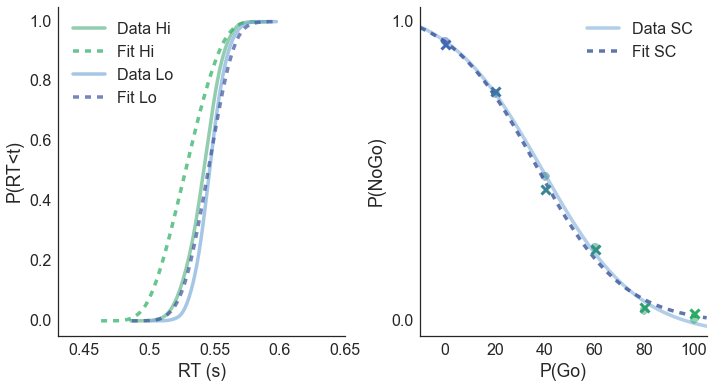

In [226]:
m.simulate()
m.avg_y
vis.plot_fits(m.avg_y, m.simulate(), kind='pro')

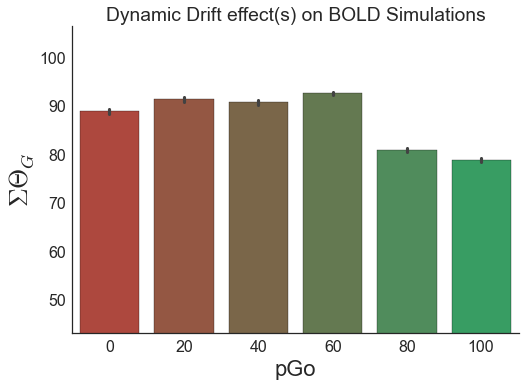

In [227]:
#b.plot_traces(save=True)
b.plot_means(save=True)

In [222]:
plt.plot(((b.go_traces[i].T+b.xtb[i]).T).mean(axis=1))

0      1.0016
1      1.0026
2      1.0040
3      1.0050
4      1.0065
5      1.0076
6      1.0085
7      1.0098
8      1.0110
9      1.0122
10     1.0133
11     1.0145
12     1.0159
13     1.0170
14     1.0182
        ...  
445    1.5208
446    1.5220
447    1.5229
448    1.5240
449    1.5250
450    1.5261
451    1.5262
452    1.5273
453    1.5283
454    1.5295
455    1.5289
456    1.5303
457    1.5315
458    1.5327
459       NaN
dtype: float64

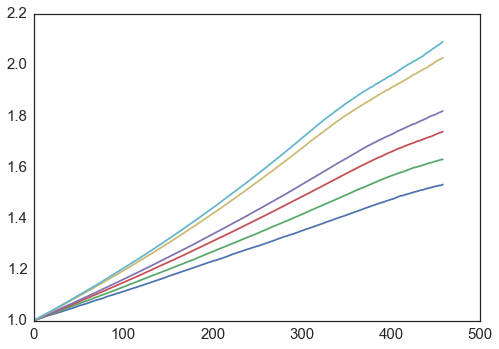

In [223]:
for i in range(b.ncond):
      plt.plot(((b.go_traces[i].T+b.xtb[i]).T).mean(axis=1))

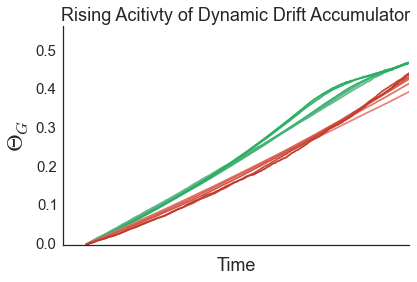

In [209]:
b.plot_traces()
#b.plot_means()

In [183]:
b=neuro.BOLD(m)

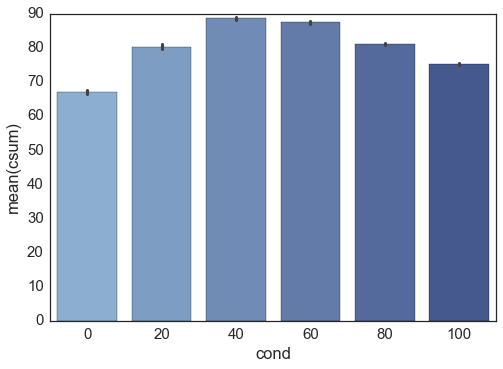

In [65]:
ax = sns.barplot('cond', 'csum', data=splitdf, order=splitdf.cond.unique(), palette=bpal(6))
dat = [l.get_ydata() for l in ax.get_lines()]


In [66]:
dat

[array([ 66.44363,  67.80169]),
 array([ 79.82252,  81.03588]),
 array([ 88.22779,  89.08801]),
 array([ 87.13549,  87.90245]),
 array([ 80.78854,  81.51639]),
 array([ 74.92349,  75.5133 ])]

In [103]:
go_csum = [gt.cumsum(axis=0).max(axis=0).values for gt in b.go_traces]
ng_csum = [ng.cumsum(axis=0).max(axis=0).values for ng in b.ng_traces]


In [158]:
df.cond.unique()

array([ 60,  80, 100,   0,  20,  40])

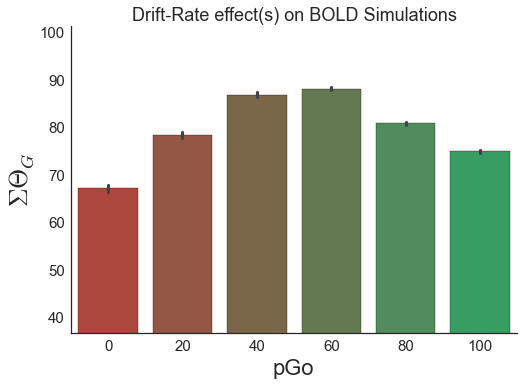

In [162]:
b.plot_means()

In [155]:
df = b.bold_mag.copy()

df.ix[(df.choice=='go')&(df.cond<=50), 'cond']=60
df.ix[(df.choice=='nogo')&(df.cond>=50), 'cond']=40


In [156]:
mu = df.groupby(['choice','cond']).mean()['csum']


csum
choice cond         
go     60    88.4154
       80    81.1854
       100   75.2697
nogo   0     67.4893
       20    78.7259
       40    87.2023

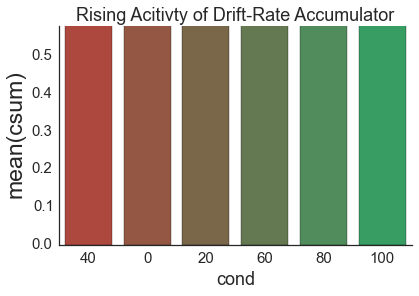

In [94]:
b = boldfx.BOLD(m)
b.simulate_bold()
b.make_bold_dfs(shape='long')
#%cd ~/Desktop/
#dat = b.plot_means()
b.plot_traces()
dat = b.plot_means(save=True)

#gt = b.go_traces
#gt[0].cumsum(axis=0).max()

In [88]:
splitdf = pd.concat([nodf, godf])

In [90]:
godf = b.bold_mag.query('choice=="go"').copy()

In [ ]:
godf

In [86]:
godf.ix[(godf.choice=='go')&(godf.cond<=50), 'cond']=60

#nodf[nodf.cond>=50].loc[:, 'cond']='40'
#splitdf = pd.concat([nodf, godf])


In [111]:
df = b.bold_mag.copy()
df.ix[(df.choice=='go')&(df.cond<=50), 'cond']=60
df.ix[(df.choice=='nogo')&(df.cond>=50), 'cond']=40

In [121]:
x=np.ptp(df.groupby(['cond']).mean().values)

In [150]:
x = df.groupby(['choice','cond']).describe().csum

In [151]:
x.unstack()['min']

choice  cond
go      60      60.5504
        80      60.5595
        100     57.3782
nogo    0       15.6006
        20      35.7243
        40      53.4806
Name: min, dtype: float64

In [147]:
#x.query('ilevel_1=="min"')


AttributeError: 'Series' object has no attribute 'query'

In [89]:
splitdf[splitdf.choice=='go'].cond.unique()

array([ 60,  80, 100])

In [12]:
m = build.Model(data=redf_store.redata, kind='xradd', depends_on={'v':'Cond'}, dynamic='exp')


      Model is prepared to fit xradd model (w/ exp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of Cond (bsl, pnl)

      I wish you a merry fit, and a happy Nature paper 



In [17]:
godf = b.bold_mag.query('choice=="go"&cond>=50')

In [243]:
np.min([l.get_ydata() for l in ax.get_lines()])

66.209310422034292

In [241]:
.get_ydata()

array([ 66.20931,  67.50501])

In [245]:
#sns.FacetGrid()
#godf = b.bold_mag.query('choice=="go"&cond>=50')
#nodf = b.bold_mag.query('choice=="nogo"&cond<=50')
godf = b.bold_mag.query('choice=="go"')
nodf = b.bold_mag.query('choice=="nogo"')

godf[godf.cond<=50].loc[:, 'cond']='60'
nodf[nodf.cond>=50].loc[:, 'cond']='40'

splitdf = pd.concat([nodf, godf])
ax = sns.barplot('cond', 'csum', data=splitdf, x_order=splitdf.cond.unique(), palette=redgreen(6))
ax.set_ylim(40, 100)
sns.despine()
ax.set_xlabel('pGo')
ax.set_ylabel('$\Sigma \Theta_{G}$', fontsize=26)
ax.set_title(" ".join([titl, 'effect(s) on BOLD Simulations']))
dat = [l.get_ydata() for l in ax.get_lines()]
np.min(dat)
ax.set_ylim(np.min(dat)*.6, np.max(dat)*1.08)

#sns.barplot('cond', 'csum',  data=b.bold_mag, x_order=m.labels)

(39.714324556442314, 96.061297144818667)

In [197]:
b.bold_mag

,choice,0,20,40,60,80,100
0,go,98.1275,96.5521,82.2702,78.2618,84.3362,75.0616
1,go,94.2015,92.2682,92.7300,70.6802,75.6483,75.7616
2,go,99.2158,86.8122,71.2267,86.1469,89.1955,61.9020
3,go,92.2034,98.0117,98.0484,88.9927,98.3506,71.0411
4,go,98.0690,92.6970,98.1151,96.5033,80.8747,76.1631
5,go,92.9666,87.8107,99.8761,88.9655,85.0476,81.1538
6,go,88.6772,93.4707,94.7176,69.2925,86.8524,72.0545
7,go,99.2411,98.0558,85.6658,101.1965,72.4931,77.0378
8,go,101.7058,84.2335,100.4053,78.9309,80.0193,65.0228
9,go,86.5366,92.4033,99.0072,94.8296,81.3438,77.2213


In [ ]:
ax = sns.barplot(x=np.arange(len(x)), y=y, palette=redgreen(6))

In [160]:
('cond', ['go']*len(go_bold_accum))

('cond', ['go', 'go', 'go', 'go', 'go', 'go'])

In [168]:
a = OrderedDict(zip(m.labels, gobold_csum) + zip(['cond']*len(m.labels), ['go']*len(m.labels)))

In [184]:
go_bold_accum = array([gt.cumsum(axis=0).max(axis=0).values for gt in b.go_traces])
df = pd.DataFrame.from_dict(OrderedDict(zip(m.labels, gobold_csum) + zip(['cond']*len(go_bold_accum), ['go']*len(go_bold_accum))), orient='index').T

In [185]:
OrderedDict()

,0,20,40,60,80,100,cond
0,89.185,88.231,92.706,82.725,80.144,72.742,g
1,93.671,93.61,94.711,89.471,76.183,72.894,o
2,85.046,93.11,101.77,88.797,82.916,80.37,NaN
3,99.88,85.458,99.49,87.712,77.427,74.499,NaN
4,96.125,89.515,96.153,87.106,83.776,76.174,NaN
5,95.635,100.98,91.082,86.32,75.918,69.802,NaN
6,85.421,99.127,99.747,90.67,74.268,66.354,NaN
7,84.968,95.881,84.59,82.302,79.669,79.317,NaN
8,98.306,92.251,92.865,79.386,79.776,88.616,NaN
9,100.08,86.707,82.125,91.41,98.284,72.738,NaN


In [157]:
np.sort(['go', 'nogo']*len(df))

array(['go', 'go', 'go', ..., 'nogo', 'nogo', 'nogo'], 
      dtype='|S4')

In [155]:
df.insert(0, 'cond', np.sort(['go', 'nogo']*len(df)))

In [156]:
df

,cond,0,20,40,60,80,100
0,go,89.1854,88.2306,92.7059,82.7251,80.1441,72.7424
1,go,93.6715,93.6097,94.7110,89.4712,76.1827,72.8935
2,go,85.0458,93.1101,101.7700,88.7969,82.9163,80.3703
3,go,99.8799,85.4583,99.4903,87.7123,77.4273,74.4989
4,go,96.1253,89.5148,96.1528,87.1063,83.7765,76.1742
5,go,95.6351,100.9769,91.0820,86.3202,75.9177,69.8021
6,go,85.4213,99.1272,99.7475,90.6699,74.2680,66.3540
7,go,84.9676,95.8807,84.5900,82.3022,79.6689,79.3167
8,go,98.3057,92.2506,92.8655,79.3863,79.7757,88.6164
9,go,100.0843,86.7069,82.1253,91.4100,98.2840,72.7381


In [139]:
x = []
for i, gb in enumerate(go_bold_accum):
      x.append(pd.DataFrame.from_dict(({'cond':m.labels[i], 'csum': gb})))
df_long = pd.concat(x)

In [140]:
df_long

,cond,csum
0,0,89.1854
1,0,93.6715
2,0,85.0458
3,0,99.8799
4,0,96.1253
5,0,95.6351
6,0,85.4213
7,0,84.9676
8,0,98.3057
9,0,100.0843


In [119]:
b.go_traces[2].cumsum(axis=0).mean().mean()

29.087652170075945

In [85]:
redgreen = lambda nc: sns.blend_palette(["#c0392b", "#27ae60"], n_colors=nc)

titl='x'#describe_model(b.depends_on)

x=np.array(['0', '25', '50', '50', '75', '100'])
y=np.concatenate((b.ngbold_mu[:3], b.gobold_mu[:3]))
sns.set(style='ticks', font_scale=1.5)

rg = redgreen(6)

ax = sns.barplot(x=np.arange(len(x)), y=y, palette=redgreen(6))
ax.set_xticklabels(x)
ax.set_xlabel('pGo')
ax.set_ylabel('$\Sigma \Theta_{G}$', fontsize=26)
ax.set_title(" ".join([titl, 'effect(s) on BOLD Simulations']))
ax.set_ylim(y.min()*.6, y.max()*1.08)
sns.despine()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [82]:
b.plot_bold_means(save=False)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [56]:
gt = b.ngbold_mu

In [73]:
b.[0]

array([ -1.49180e-04,   2.98578e-04,   4.48194e-04,   5.98029e-04,
         1.34655e-03,   2.99451e-03,   3.74588e-03,   4.19845e-03,
         5.25189e-03,   5.70622e-03,   6.16121e-03,   6.91763e-03,
         8.27712e-03,   9.63859e-03,   1.07006e-02,   1.17642e-02,
         1.31312e-02,   1.38960e-02,   1.43596e-02,   1.57315e-02,
         1.58943e-02,   1.75723e-02,   1.89495e-02,   2.00253e-02,
         2.07990e-02,   2.15738e-02,   2.26539e-02,   2.34312e-02,
         2.39051e-02,   2.52939e-02,   2.57698e-02,   2.62464e-02,
         2.76400e-02,   2.96468e-02,   3.07390e-02,   3.15266e-02,
         3.23154e-02,   3.24923e-02,   3.42032e-02,   3.49956e-02,
         3.60964e-02,   3.65839e-02,   3.70721e-02,   3.72531e-02,
         3.83587e-02,   3.85409e-02,   3.96489e-02,   4.10674e-02,
         4.09429e-02,   4.23643e-02,   4.37878e-02,   4.49037e-02,
         4.60212e-02,   4.74504e-02,   4.88817e-02,   5.00044e-02,
         5.05072e-02,   5.16327e-02,   5.24486e-02,   5.32656e

In [60]:
low = gt[0]
med = gt[2]
hi = gt[-2]
lowtraces = low.mean(axis=1)
medtraces = med.mean(axis=1)
hitraces = hi.mean(axis=1)

In [61]:
all(hitraces.isnull())

False

In [62]:
xl = [lowtraces, medtraces, hitraces]
l = ['low', 'med', 'hi']
for i in range(3):
      plt.plot(xl[i], label=l[i])

In [32]:
xl = [lowtraces, medtraces, hitraces]
l = ['low', 'med', 'hi']
for i in range(3):
      plt.plot(xl[i], label=l[i])

In [16]:
# ensure parameters are all vectorized
b.p = b.vectorize_params(b.p)
Pg, Tg = b.__update_go_process__(b.p)
Ps, Ts = b.__update_stop_process__(b.p)

ncond = b.ncond; ntot=b.ntot; dx=b.dx;
base=b.base; b.nss_all=b.nss; nssd=b.nssd;
nss_all=b.nss_all; ssd=b.ssd; nss=nss_all/b.nssd; 
xtb=b.xtb;

get_ssbase = lambda Ts,Tg,DVg: array([[DVc[:nss/nssd, ix] for ix in np.where(Ts<Tg[i], Tg[i]-Ts, 0)] for i, DVc in enumerate(DVg)])[:,:,:,None]


b.gomoments = xtb[:,None]*np.where((rs((ncond, ntot, Tg.max())).T<Pg), dx,-dx).T
b.ssmoments = np.where(rs((ncond, nssd, nss, Ts.max()))<Ps, dx, -dx)

b.dvg = base[:, None]+xtb[:,None] * np.cumsum(b.gomoments, axis=2)
b.dvs = b.get_ssbase(Ts,Tg,b.dvg) + np.cumsum(b.ssmoments, axis=3)

gomoments = np.where((rs((ncond, ntot, Tg.max())).T<Pg), dx,-dx).T
dvg = gomoments[:,nss_all:,:].reshape(ncond,nssd,nss,Tg.max())

ssmoments = np.where(rs((ncond, nssd, nss, Ts.max()))<Ps, dx, -dx)
dvs = ssmoments.copy()


In [ ]:
np.concatenate()

# asdfasd

In [369]:

ss_list, go_list=[],[]
for i, (s, g) in enumerate(zip(dvs, dvg)):
      
      diff = Ts-Tg[i]
      pad_go = diff[diff>0]
      pad_ss = abs(diff[diff<0])

      go_list.extend([np.concatenate((np.zeros((nss, gpadd)), g[i]), axis=1) for pi, gpadd in enumerate(pad_go)])
      go_list.extend([g[x] for x in range(len(pad_ss))])
      
      ss_list.extend([s[i,:,-tss:] for tss in Ts[:len(pad_go)]])
      ss_list.extend([np.concatenate((np.zeros((nss, abs(spad))), s[i, :, -(Tg[i]-spad):]), axis=1) for spad in pad_ss])

r = map((lambda x: np.cumsum((x[0] + x[1]), axis=1)), zip(go_list, ss_list))       

In [361]:
r = map((lambda x: np.cumsum((x[0] + x[1]), axis=1)), zip(go_list, ss_list))

In [201]:
def align_vectors(g, s, Ts, Tg):
      
      #diff = Ts[ii] - Tg[i]
      diff = ts-tg
      #for diff in diffs:

      if diff>0:
            concat = np.concatenate((np.zeros(diff), g), axis=1)
            out = [concat, s]
      else:
            out = [g, s[:,diff:]]

      return out

In [293]:
m = build.Model(data=prodf_store.prodata, kind='xpro', inits=inits, depends_on={'v':'pGo'}, dynamic='exp')

n = build.Model(data=prodf_store.prodata, kind='xpro', inits=inits, depends_on={'v':'pGo', 'tr':'pGo'}, dynamic='exp')


      Model is prepared to fit xpro model (w/ exp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      See, it's not that simplex... 


      Model is prepared to fit xpro model (w/ exp dynamic bias) to average data,
      allowing Onset Time and Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      'They dont think it be like it is, but it do' -Oscar Gamble 



In [ ]:
glo

In [ ]:
globa

In [329]:
 id_model = lambda mod: [['_'.join([dirname, mod.dynamic]).upper() if 'x' in mod.kind else dirname.upper() for dirname in ['_'.join([k for k in mod.depends_on.keys()])]][0]]

SyntaxError: invalid syntax (<ipython-input-329-e549fa572998>, line 1)

In [328]:
id_model(m)

['V_EXP']

In [ ]:
os.path.isd

In [300]:
n.depends_on.keys()

['tr', 'v']

In [320]:
mlist = [m, n]

dirlist = [['_'.join([dirname, mod.dynamic]).upper() if 'x' in mod.kind else dirname.upper() for dirname in ['_'.join([k for k in mod.depends_on.keys()])]][0] for mod in mlist]

In [321]:
dirlist

['V_EXP', 'TR_V_EXP']

In [324]:
rootdir='~/Dropbox'

In [325]:
path_list = ['/'.join([rootdir, mlist[i].kind.upper(), dirlist[i]]) for i in range(len(mlist))]

In [326]:
path_list

['~/Dropbox/XPRO/V_EXP', '~/Dropbox/XPRO/TR_V_EXP']

In [305]:
m.depends_on.keys()

['v']

In [290]:
mlist[1].depends_on.keys()

['tr', 'v']

In [287]:
x = [['_'.join([dirname, m.dynamic]).upper() if 'x' in m.kind else dirname.upper() for dirname in ['_'.join([k for k in m.depends_on.keys()])]] for m in mlist]

In [288]:
x

[['TR_V_EXP'], ['TR_V_EXP']]

In [268]:
'_'.join([k for k in m.depends_on.keys()])

'tr_v'

In [1464]:
inits = ttheta
inits['tr'] = np.mean(topt.values())
inits['xb'] = 2

inits = vtheta
inits['v'] = np.mean(vopt.values())
inits['xb'] = .01

inits = {'a': array([ 0.47302,  0.47302,  0.47302,  0.47302,  0.47302,  0.47302]),
      'tr': array([ 0.33022,  0.33022,  0.33022,  0.33022,  0.33022,  0.33022]),
      'v': array([ 0.69306,  0.81906,  0.94506,  1.07106,  1.19706,  1.32306]),
      'xb': array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01])}


######## EXP ########
p ={'a': array([ 0.4836,  0.4836,  0.4836,  0.4836,  0.4836,  0.4836]),
      'tr': array([ 0.3375,  0.3375,  0.3375,  0.3375,  0.3375,  0.3375]),
      'v': array([ 1.08837,  1.31837,  1.54837,  1.77837,  2.00837,  2.23837]),
      'xb': array([ 1.4604,  1.4604,  1.4604,  1.4604,  1.4604,  1.4604]),
      'z': 0}
#inits = {'v': array([1.2628572, 1.4303704, 1.5704667, 1.7008534, 1.8681627, 1.9973202]), 'a':0.4835983, 'xb':1.460462, 'tr': 0.3375415}
#inits['v'] = np.mean(inits['v'])
m = build.Model(data=prodf_store.prodata, kind='xpro', inits=p, depends_on={'v':'pGo'}, dynamic='exp')


      Model is prepared to fit xpro model (w/ exp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      It's IN the computer? 



In [1466]:
m.make_simulator()
sim = m.simulator
yhat = sim.sim_fx(m.inits)


In [1419]:
m.inits

{'a': array([ 0.47302,  0.47302,  0.47302,  0.47302,  0.47302,  0.47302]),
 'tr': array([ 0.33022,  0.33022,  0.33022,  0.33022,  0.33022,  0.33022]),
 'v': array([ 0.69306,  0.81906,  0.94506,  1.07106,  1.19706,  1.32306]),
 'xb': array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01]),
 'z': 0}

In [1133]:
m.optimize(tol=1.e-10, maxfev=5000)

In [1124]:
m.popt

{'a': array([ 0.48279,  0.48279,  0.48279,  0.48279,  0.48279,  0.48279]),
 'tr': array([ 0.33419,  0.33419,  0.33419,  0.33419,  0.33419,  0.33419]),
 'v': array([ 1.62097,  1.62089,  1.6222 ,  1.63542,  1.64524,  1.63204]),
 'v_0': 1.6209706457241408,
 'v_100': 1.6320396717574699,
 'v_20': 1.6208910339245717,
 'v_40': 1.6222015259108431,
 'v_60': 1.6354187689660469,
 'v_80': 1.6452449493764905,
 'xb': array([ 0.09996,  0.09996,  0.09996,  0.09996,  0.09996,  0.09996]),
 'z': 0}

In [1135]:
m.fits

array([ 0.93775,  0.7401 ,  0.44091,  0.22174,  0.01672,  0.00905,
        0.51292,  0.5179 ,  0.51263,  0.49883,  0.54621,  0.53845,
        0.54167,  0.53891,  0.54713,  0.55512])

In [1296]:
DVs = (x + np.cumsum(np.where(rs((sim.nss, Ts.max()))<Ps, sim.dx, -sim.dx), axis=1))

(2, 5, 5000, 855)

In [1293]:
x.shape

(2, 5, 5000, 1)

In [1345]:
m.kind='xradd'
m.dynamic = 'hyp'
m.make_simulator()
sim = m.simulator
sim.ntot=2000
sim.nss=2000

sim.dynamic = 'hyp'
p = sim.vectorize_params(inits)
DVg, DVs = sim.sim_fx(p, analyze=False)

In [1346]:
DVs.shape

(2, 5, 2000, 855)

In [1362]:
DVs[:,-3:,:,:].shape

(2, 3, 2000, 855)

In [1360]:
ssd

array([ 0.2 ,  0.25,  0.3 ,  0.35,  0.4 ])

In [ ]:
vis.plot_all_traces(DVg, DVs[:,-3:,:,:], p)

In [1281]:
inits = {'v': array([1.477744347, 1.4269909]), 'a': 0.4728574, 'xb': 0.007027466, 'ssv': -0.6050566, 'tr':0.2999009, 'z':0.1546356}

In [1188]:
p['a'] = ttheta['a']

In [1257]:
dvg = sim.sim_fx(p, analyze=False)

In [1199]:
dvg = sim.sim_fx(p, analyze=True)

In [1197]:
p['xb']=.1

In [1178]:
p['xb']=.01

In [15]:
m = build.Model(data=prodf_store.prodata, kind='xpro', inits=p, dynamic='hyp')


      Model is prepared to fit xpro model (w/ hyp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      I wish you a merry fit, and a happy Nature paper 



In [4]:
######## HYP ########
p = {'a': array([ 0.47302,  0.47302,  0.47302,  0.47302,  0.47302,  0.47302]),
      'tr': array([ 0.33022,  0.33022,  0.33022,  0.33022,  0.33022,  0.33022]),
      'v': array([ 0.69306,  0.81906,  0.94506,  1.07106,  1.19706,  1.32306]),
      'xb': array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01]),
      'z': 0}


In [14]:
p = {'a': array([ 0.47302,  0.47302,  0.47302,  0.47302,  0.47302,  0.47302]),
'tr': array([ 0.33022,  0.33022,  0.33022,  0.33022,  0.33022,  0.33022]),
'v': array([ 0.69306,  0.81906,  0.94506,  1.07106,  1.19706,  1.32306]),
'xb': array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01]),
'z': 0}

In [22]:
m.inits

{'a': array([ 0.47302,  0.47302,  0.47302,  0.47302,  0.47302,  0.47302]),
 'tr': array([ 0.33022,  0.33022,  0.33022,  0.33022,  0.33022,  0.33022]),
 'v': array([ 0.69306,  0.81906,  0.94506,  1.07106,  1.19706,  1.32306]),
 'xb': array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01]),
 'z': 0}

In [21]:
m.make_simulator()
yhat = m.simulate()

In [19]:
m.inits

{'a': array([ 0.47302,  0.47302,  0.47302,  0.47302,  0.47302,  0.47302]),
 'tr': array([ 0.33022,  0.33022,  0.33022,  0.33022,  0.33022,  0.33022]),
 'v': array([ 0.69306,  0.81906,  0.94506,  1.07106,  1.19706,  1.32306]),
 'xb': array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01]),
 'z': 0}

In [23]:
yhat

array([ 0.96038,  0.86315,  0.69388,  0.44178,  0.21729,  0.07083,
        0.53572,  0.54472,  0.54922,  0.55322,  0.55772,  0.54772,
        0.55272,  0.55572,  0.55772,  0.55922])

In [9]:
m.avg_y

array([ 0.93593,  0.76048,  0.48493,  0.24628,  0.03778,  0.00566,
        0.52662,  0.53943,  0.54339,  0.54519,  0.55182,  0.54101,
        0.54466,  0.54514,  0.54602,  0.55478])

In [1156]:
######## EXP ########
p ={'a': array([ 0.4836,  0.4836,  0.4836,  0.4836,  0.4836,  0.4836]),
      'tr': array([ 0.3375,  0.3375,  0.3375,  0.3375,  0.3375,  0.3375]),
      'v': array([ 1.08837,  1.31837,  1.54837,  1.77837,  2.00837,  2.23837]),
      'xb': array([ 1.4604,  1.4604,  1.4604,  1.4604,  1.4604,  1.4604]),
      'z': 0}

In [1139]:
m.fitinfo

{'AIC': -103.67537219453163,
 'BIC': -99.039839861092943,
 'CNVRG': False,
 'a': 0.4754793673006642,
 'chi': 0.0072473045230972456,
 'nfev': 3210,
 'rchi': 0.00072473045230972454,
 'tr': 0.27264786051789541,
 'v_0': 1.3830371294110217,
 'v_100': 2.0506503009456045,
 'v_20': 1.5376788921410831,
 'v_40': 1.66759925439495,
 'v_60': 1.7762231715594445,
 'v_80': 1.9669605890505362,
 'xb': 0.0090041155431756469}

In [1467]:
b = boldfx.BOLD(m)
b.get_bold_dfs()

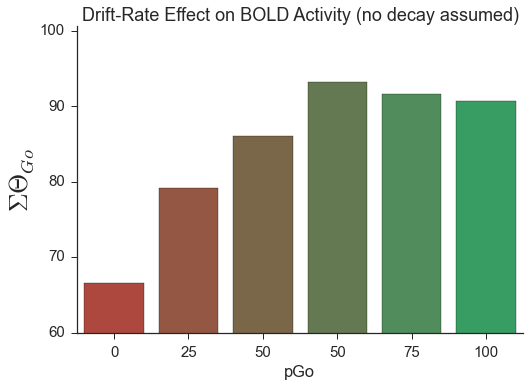

In [1468]:
b.plot_results()

In [876]:
Pg, Tg = sim.__update_go_process__(p)
DVg = np.cumsum(np.where((rs((sim.ncond, sim.ntot, Tg.max())).T<Pg), sim.dx,-sim.dx).T, axis=2)

In [341]:
p = {'a': array([0.44302]*6), #,  0.46302,  0.46302,  0.46302,  0.46302,  0.46302]),
'tr': array([0.30022]*6), #,  0.31022,  0.31022,  0.31022,  0.31022,  0.31022]),
'v': array([0.55306,  0.72906,  .85506,  1.10106,  1.39706,  1.52306]),
'xb': np.append([0.03]*3, [.002]*3), #,  0.09,  0.09,  0.09,  0.09,  0.09]),
'z': array([0]*6)}
m.inits = p

In [877]:
DVg = sim.base[:,None]+(sim.xtb[:,None]*np.cumsum(np.where((rs((sim.ncond, sim.ntot, Tg.max())).T<Pg), sim.dx,-sim.dx).T, axis=2))


In [855]:
Ps, Ts = sim.__update_stop_process__(p)
Ts = np.ravel(map((lambda x: np.where(Ts<x, x-Ts, 0)), Tg))
sb = array([[DVc[:, dvs0] for dvs0 in Ts] for DVc in DVg])

In [920]:
inits = {'a':0.3267, 'tr': array([ 0.28082,  0.28855,  0.30535,  0.32555,  0.34669,  0.36803]), 'v': 1.3813, 'xb':1.307329}

In [244]:
base = get_base([p['z'], p['a'],p['xb']])
xtb = sim.get_xtb(Tg, p['xb'])

In [1159]:
yhat = m.simulate()

In [1263]:
yhat

array([ 0.9974,  0.9942,  0.967 ,  0.8542,  0.2278,  0.0444,  0.4774,
        0.4979,  0.5144,  0.5324,  0.5599,  0.4724,  0.4934,  0.5084,
        0.5249,  0.5494,  0.9926,  0.9962,  0.9736,  0.8692,  0.276 ,
        0.0488,  0.4819,  0.5039,  0.5199,  0.5389,  0.5684,  0.4779,
        0.4979,  0.5144,  0.5304,  0.5579])

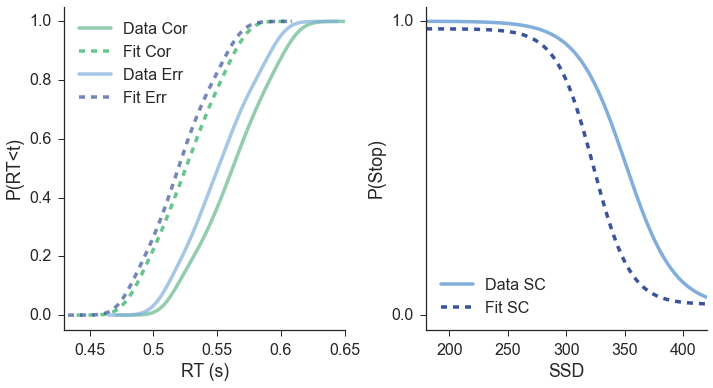

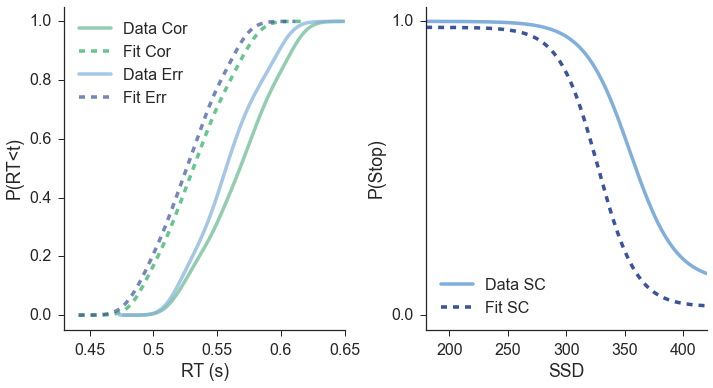

In [1275]:
for i in range(m.ncond):
      vis.plot_fits(m.avg_y[i], yhat.reshape(2,16)[i], kind='radd')